### Машинное обучение
## Домашнее задание №3 - Градиентный бустинг

**Общая информация**

**Срок сдачи:** 5 декабря 2023, 23:59   
**Штраф за опоздание:** -2 балла за каждые сутки

Используйте данный Ipython Notebook при оформлении домашнего задания.

##  Считаем производные для функций потерь (1 балл)

Мы будем реализовать градиентный бустинг для 3 функций потерь:

1) MSE  $L(a(x_i), y_i) = (y_i - a(x_i)) ^ 2$

2) Экспоненциальная  $L(a(x_i), y_i) = exp( -a(x_i) y_i), y_i \in \{-1, 1\}$

3) Логистическая  $L(a(x_i), y_i) = \log (1 + exp( -a(x_i) y_i)), y_i \in \{-1, 1\}$

где $a(x_i)$ предсказание бустинга на итом объекте.

Для каждой функции потерь напишите таргет, на который будет настраиваться каждое дерево в бустинге.

Ваше решение тут

In [22]:
def mse_loss(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def mse_loss_gradients(targets, predictions):
    return -2 * targets * (targets - predictions)

def exp_loss(targets, predictions):
    return np.mean(-targets / np.exp(targets * predictions))

def exp_loss_gradients(targets, predictions):
    return -targets / np.exp(targets * predictions)

def log_loss(targets, predictions):
    return np.mean(np.log(1 + np.exp(-targets * predictions)))

def log_loss_gradients(targets, predictions):
    return -targets / np.exp(targets * predictions + 1)

##  Реализуем градиентный бустинг (3 балла)

Реализуйте класс градиентного бустинга для классификации. Ваша реализация бустинга должна работать по точности не более чем на 5 процентов хуже чем GradientBoostingClassifier из sklearn.


Детали реализации:

-- должно поддерживаться 3 функции потерь

-- сами базовые алгоритмы(деревья, линейные модели и тп) реализовать не надо, просто возьмите готовые из sklearn

-- в качестве функции потерь для построения одного дерева используйте MSE

-- шаг в бустинге можно не подбирать, можно брать константный

-- можно брать разные модели в качестве инициализации бустинга

-- должны поддерживаться следующие параметры:

а) число итераций
б) размер шага
в) процент случайных фичей при построении одного дерева
д) процент случайных объектов при построении одного дерева
е) параметры базового алгоритма (передавайте через **kwargs)

In [6]:
import numpy as np

from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from tqdm.auto import tqdm

In [20]:
# class MyGradientBoostingClassifier:

#     def __init__(self, loss, learning_rate, n_estimators, colsample, subsample, *args, **kwargs):
#         """
#         loss -- один из 3 лоссов:
#         learning_rate -- шаг бустинга
#         n_estimators -- число итераций
#         colsample -- процент рандомных признаков при обучнеии одного алгоритма
#         colsample -- процент рандомных объектов при обучнеии одного алгоритма
#         args, kwargs -- параметры  базовых моделей
#         """
#         # Ваш код здесь
#         if loss == 'MSE':
#             self.loss = mse_loss
#             self.grad = mse_loss_gradients

#         elif loss == 'Exponential':
#             self.loss = exp_loss
#             self.grad = exp_loss_gradients

#         elif loss == 'LogLoss':
#             self.loss = log_loss
#             self.grad = log_loss_gradients

#         self.lr = learning_rate
#         self.n_estimators = n_estimators
#         self.colsample = colsample
#         self.subsample = subsample
#         self.base_algo_params = kwargs

#     def fit(self, X, y, base_model, init_model=None):
#         """
#         X -- объекты для обучения:
#         y -- таргеты для обучения
#         base_model -- класс базовых моделей, например sklearn.tree.DecisionTreeRegressor
#         init_model -- класс для первой модели, если None то берем константу (только для посл задания)
#         """
#         # Ваш код здесь

#         if init_model is None:
#             self.class_count = len(np.unique(y))
#             new_y = np.zeros((len(y), self.class_count))
#             for i in range(len(y)):
#                 new_y[i][y[i]] = 1

#         else:
#             init_model = init_model()
#             init_model.fit(X, y)
#             new_y = init_model.predict(X)

#         self.models_list = []
#         self.losses = []

#         for step in range(self.n_estimators):
#             models_layer = []
#             for class_num in range(self.class_count):
#                 model = base_model()
#                 models_layer.append(model.fit(X, new_y[:, class_num]))

#             self.models_list.append(models_layer)
#             self.predict(X)

#             self.losses.append(self.loss(new_y, self.pred_fit))
#             gradients = self.grad(new_y, self.pred_fit)
#             new_y = - gradients



#         return self

#     def predict(self, X):
#         predictions = np.zeros((len(X), self.class_count))
#         for layer in range(len(self.models_list)):
#             for model_num in range(self.class_count):
#                 predictions[:, model_num] += self.models_list[layer][model_num].predict(X) * self.lr

#         self.pred_fit = predictions

#         predictions = np.argmax(predictions, axis=1)

#         return predictions

class ModelsAnsemble:
    def __init__(self):

        self.models_list = []

    def add_models_layer(self, fitted_layer):

        self.models_list.append(fitted_layer)


class MyGradientBoostingClassifier:
    def __init__(self, loss, learning_rate, n_estimators, subsample=None, colsample=1.0, *args, **kwargs):
        """
        loss -- один из 3 лоссов:
        learning_rate -- шаг бустинга
        n_estimators -- число итераций
        colsample -- процент рандомных признаков при обучнеии одного алгоритма
        colsample -- процент рандомных объектов при обучнеии одного алгоритма
        args, kwargs -- параметры  базовых моделей
        """
        # Ваш код здесь
        if loss == 'MSE':
            self.loss = mse_loss
            self.grad = mse_loss_gradients

        elif loss == 'Exponential':
            self.loss = exp_loss
            self.grad = exp_loss_gradients

        elif loss == 'LogLoss':
            self.loss = log_loss
            self.grad = log_loss_gradients

        self.lr = learning_rate
        self.n_estimators = n_estimators
        self.colsample = colsample
        self.subsample = subsample
        self.args = args
        self.base_algo_params = kwargs

    def fit(self, X, y, base_model, init_model=None):
        """
        X -- объекты для обучения:
        y -- таргеты для обучения
        base_model -- класс базовых моделей, например sklearn.tree.DecisionTreeRegressor
        init_model -- класс для первой модели, если None то берем константу (только для посл задания)
        """
        # Ваш код здесь
        # X = np.array(X)
        rows_count, cols_count = X.shape
        self.class_names, class_counts = np.unique(y, return_counts=True)

        y_ohe = np.zeros((len(y), len(self.class_names)))
        for i in range(len(y)):
            y_ohe[i][y[i]] = 1

        y_prob = class_counts / np.sum(class_counts)

        if init_model is None:
            self.start_y = []
            for i in range(len(y)):
                self.start_y.append(y_prob)

        else:
            init_model = init_model()
            init_model.fit(X, y)
            self.start_y = init_model.predict_proba(X)

        if self.subsample:
            n_subsamples = int(self.subsample * rows_count)
        n_colsamples = int(self.colsample * cols_count)
        new_y = self.start_y

        self.models_ansemble = ModelsAnsemble()
        for step in range(self.n_estimators):
            gradient = -self.grad(y_ohe, new_y)
            models_list = []

            if self.subsample:
                subsamples = np.random.choice(np.arange(rows_count), size=n_subsamples, replace=True)
            else:
                subsamples = np.arange(X.shape[0])

            colsamples = np.random.choice(cols_count, size=n_colsamples, replace=False)
            X_samp = X[subsamples, :][:, colsamples]
            y_samp = gradient[subsamples, :]

            test_pred = []

            for i in range(len(self.class_names)):
                estimator = base_model(*self.args, **self.base_algo_params)

                estimator.fit(X_samp, y_samp[:, i])

                models_list.append(estimator)

            self.models_ansemble.add_models_layer((models_list, colsamples))

            new_y += self.lr * self.layer_predict((models_list, colsamples), X_samp)

    def layer_predict(self, models_list, X):
        models_list, colsamples = models_list[0], models_list[1]
        X_samp = X[:, colsamples]
        preds = np.zeros((len(X_samp), len(models_list)))
        for i in range(len(models_list)):
            preds[:, i] = models_list[i].predict(X_samp)
        return preds

    def predict(self, X):
        pred = np.zeros((len(X), len(self.class_names)))
        pred += np.array(self.start_y[:len(X)]) * self.lr

        for model_layer in self.models_ansemble.models_list:
            pred += self.layer_predict(model_layer, X) * self.lr

        # print(pred)

        return np.argmax(pred, axis=1)

In [702]:
my_clf = MyGradientBoostingClassifier('LogLoss', 0.1, 5, max_depth=2)
clf = GradientBoostingClassifier()

In [627]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, stratify=wine.target)

In [703]:
my_clf.fit(X_train, y_train, DecisionTreeRegressor)
pred = my_clf.predict(X_test)

In [706]:
pred

array([0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1])

In [707]:
y_test

array([0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1])

In [708]:
my_clf.fit(X_train, y_train, DecisionTreeRegressor)
clf.fit(X_train, y_train)
print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))
print(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

0.8888888888888888
0.8888888888888888


## Подбираем параметры (2 балла)

Давайте попробуем применить Ваш бустинг для предсказаний цены домов в Калифорнии. Чтобы можно было попробовтаь разные функции потерь, переведем по порогу таргет в 2 класса: дорогие и дешевые дома.

В задании нужно

1) Построить график точности в зависимости от числа итераций на валидации.

2) Подобрать оптимальные параметры Вашего бустинга на валидации.


In [8]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [9]:
# Превращаем регрессию в классификацию
y = (y > 2.0).astype(int)
print(X.shape, y.shape)

(20640, 8) (20640,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [727]:
losses = ['Exponential', 'MSE', 'LogLoss']
exp_acc = {'test': [],
           'train': []}
log_acc = {'test': [],
           'train': []}
mse_acc = {'test': [],
           'train': []}
for iteration in tqdm(range(1, 200, 10)):
    my_clf = MyGradientBoostingClassifier('MSE', 0.2, iteration, 1, 1, max_depth=6)
    my_clf.fit(X_train, y_train, DecisionTreeRegressor)
    mse_acc['test'].append(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))
    mse_acc['train'].append(accuracy_score(y_pred=my_clf.predict(X_train), y_true=y_train))

    my_clf = MyGradientBoostingClassifier('Exponential', 0.2, iteration, 1, 1, max_depth=6)
    my_clf.fit(X_train, y_train, DecisionTreeRegressor)
    exp_acc['test'].append(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))
    exp_acc['train'].append(accuracy_score(y_pred=my_clf.predict(X_train), y_true=y_train))

    my_clf = MyGradientBoostingClassifier('LogLoss', 0.2, iteration, 1, 1, max_depth=6)
    my_clf.fit(X_train, y_train, DecisionTreeRegressor)
    log_acc['test'].append(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))
    log_acc['train'].append(accuracy_score(y_pred=my_clf.predict(X_train), y_true=y_train))

  0%|          | 0/20 [00:00<?, ?it/s]

[0.8275193798449613, 0.8551356589147286, 0.8556201550387597, 0.8083817829457365, 0.7790697674418605, 0.657218992248062, 0.6836240310077519, 0.7078488372093024, 0.84375, 0.8524709302325582, 0.8502906976744186, 0.751453488372093, 0.7538759689922481, 0.8267926356589147, 0.8074127906976745, 0.6322674418604651, 0.39292635658914726, 0.8500484496124031, 0.5729166666666666, 0.280765503875969]


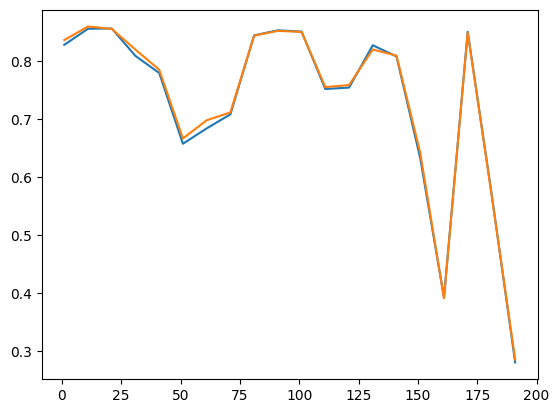

In [728]:
import matplotlib.pyplot as plt
x = [i for i in range(1, 200, 10)]

print(mse_acc['test'])

plt.plot(x, mse_acc['test'], x, mse_acc['train'])

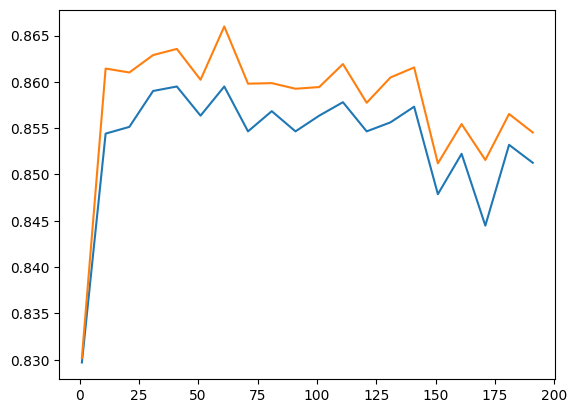

In [729]:
plt.plot(x, log_acc['test'], x, log_acc['train'])

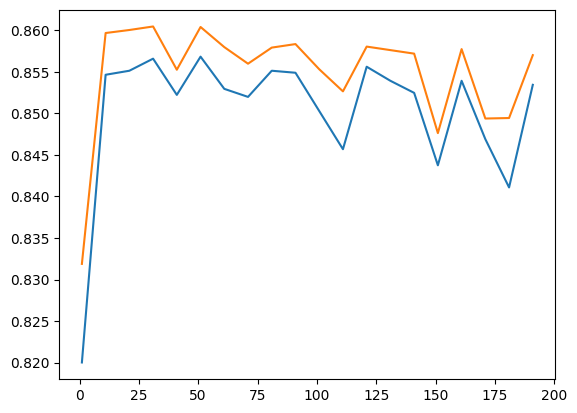

In [730]:
plt.plot(x, exp_acc['test'], x, exp_acc['train'])

In [738]:
max(log_acc['test'])

0.8594961240310077

Оптимально использовать Логистическую функцию потерь и 55 итераций

## BooBag BagBoo (1 балл)



Попробуем объединить бустинг и бэгинг. Давайте

1) в качестве базовой модели брать не дерево решений, а случайный лес (из sklearn)

2) обучать N бустингов на бустрапированной выборке, а затем предикт усреднять

Попробуйте обе этих стратегии на данных из прошлого задания. Получилось ли улучшить качество? Почему?

In [756]:
from sklearn.ensemble import RandomForestRegressor

my_clf = MyGradientBoostingClassifier('LogLoss', 0.2, 50, 1, 1, max_depth=8)
my_clf.fit(X_train, y_train, RandomForestRegressor)

pred = my_clf.predict(X_test)

In [757]:
accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test)

0.8694282945736435

In [758]:
size = len(X_train)
idxs = np.arange(size)
bootstrap_samples = [np.random.choice(idxs, size=size, replace=True) for i in range(40)]
accs = []
for sample in tqdm(bootstrap_samples):
    X_sample = X_train[sample]
    y_sample = y_train[sample]
    my_clf = MyGradientBoostingClassifier('LogLoss', 0.2, 80, 1, 1, max_depth=8)
    my_clf.fit(X_sample, y_sample, DecisionTreeRegressor)
    accs.append(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

np.mean(accs)

  0%|          | 0/40 [00:00<?, ?it/s]

0.8632873062015504

Точность получилось улучшить.
В первом случае точность улучшилась за счет того, что мы берем модель, которая позволяет нашему алгоритму быстрее сходиться.

Во втором случае получается улучшить точность за счет того, что мы обучаем несколько моделей на различных наборах данных и общая точность алгоритма улучшается.

## Умная инициализация (1 балл)

Попробуйте брать в качестве инициализации бустинга не константу, а какой-то алгоритм и уже от его предикта стартовать итерации бустинга. Попробуйте разные модели из sklearn: линейные модели, рандом форест, svm..

Получилось ли улучшить качество? Почему?



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

models_list = [LogisticRegression,
               KNeighborsClassifier,
               GradientBoostingClassifier]

accs = []

for model in tqdm(models_list):
    my_clf = MyGradientBoostingClassifier('LogLoss', 0.2, 80, 1, 1, max_depth=8)
    my_clf.fit(X_train, y_train, DecisionTreeRegressor, init_model=model)
    accs.append(accuracy_score(y_pred=my_clf.predict(X_test), y_true=y_test))

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print(accs)

[0.8599806201550387, 0.8645833333333334, 0.8561046511627907]


Получилось улучшить качество с аналогичными параметрами, так как изначально нашл алгоритм стартует из более выгодной точки, а точнее из какого-то приближения, которое было получено при помощи init_model.

## Фидбек (бесценно)

* Какие аспекты обучения  ансамблей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Возможно стоит дополнительно объяснить классификацию при помощи градиентного бустинга. Изначально было не совсем понятно, как выполнять домашнее задание

На помощь пришли вот эти 2 статьи:

* https://scikit-learn.org/stable/modules/ensemble.html#id10

* https://habr.com/ru/companies/ods/articles/327250/

### Ваш ответ здесь

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.

### ВАШ ОТЗЫВ ЗДЕСЬ

